# EDA on Splotfy Million Songs Data

## Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

c:\Users\Home\anaconda3\envs\spotify-project-env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Data

In [5]:
tracks_df= pd.read_csv('./dataset/track_feats.csv')
tracks_df.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_7f435320-5d3b-497d-9346-0c97429af2b9,3.866097,0.441176,-0.403765,0.075846,0.499848,0.494943,0.461215,-0.208611,0.563252,...,0.571429,0.468440,1.034540,-1.040880,-1.281460,-0.375163,1.442307,0.045940,-0.443245,-0.243705
1,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1.512969,0.308824,0.314153,0.085482,0.450139,0.457034,0.663219,-0.305010,0.767307,...,0.571429,0.655369,0.834594,-0.653568,-0.483168,-0.538935,1.247153,0.414248,-0.468285,-0.931875
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,-1.332280,0.485294,0.001032,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,...,0.571429,0.293100,0.846650,0.123691,-2.692681,-0.770798,1.533066,-0.173705,-0.402540,1.181761
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,-0.712162,0.485294,0.558944,0.005024,0.338580,0.331703,0.348846,-0.795663,0.886674,...,0.571429,0.387131,0.920349,0.335177,-2.631787,-1.033223,1.549514,-0.036511,-0.488062,1.028883
4,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e,-1.629474,0.573529,-0.356946,0.962717,0.130125,0.092335,0.170027,-2.024206,0.005674,...,0.428571,0.030858,2.238796,-3.259609,-2.378984,1.288895,-1.053248,-3.132837,0.946820,-0.623612


In [6]:
train_df = pd.read_csv('./dataset/train_data.csv')
train_df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.000000,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.052632,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.105263,1.0,t_16bc2816-8daf-449a-a0f7-93ee884ffdda,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.157895,1.0,t_71d34c2f-1c87-43df-83ba-00832e12194c,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.210526,1.0,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,0,1,1,0,1,1,...,0,0,0,0,0,1,0,0,0,0


## EDA

<b>Dataset Info<b>

In [8]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316702 entries, 0 to 316701
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   track_id                316702 non-null  object 
 1   duration                316702 non-null  float64
 2   release_year            316702 non-null  float64
 3   us_popularity_estimate  316702 non-null  float64
 4   acousticness            316702 non-null  float64
 5   beat_strength           316702 non-null  float64
 6   bounciness              316702 non-null  float64
 7   danceability            316702 non-null  float64
 8   dyn_range_mean          316702 non-null  float64
 9   energy                  316702 non-null  float64
 10  flatness                316702 non-null  float64
 11  instrumentalness        316702 non-null  float64
 12  key                     316702 non-null  float64
 13  liveness                316702 non-null  float64
 14  loudness            

<b>Get dimension & shape of dataset<b>

In [9]:
print(f'Dimension is {tracks_df.ndim}')

Dimension is 2


In [10]:
print(f'Shape is {tracks_df.shape}')

Shape is (316702, 30)


<b>Find Missing Values<b>

In [11]:
tracks_df.isnull().sum()

track_id                  0
duration                  0
release_year              0
us_popularity_estimate    0
acousticness              0
beat_strength             0
bounciness                0
danceability              0
dyn_range_mean            0
energy                    0
flatness                  0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
mechanism                 0
is_major                  0
organism                  0
speechiness               0
tempo                     0
time_signature            0
valence                   0
acoustic_vector_0         0
acoustic_vector_1         0
acoustic_vector_2         0
acoustic_vector_3         0
acoustic_vector_4         0
acoustic_vector_5         0
acoustic_vector_6         0
acoustic_vector_7         0
dtype: int64

<AxesSubplot:>

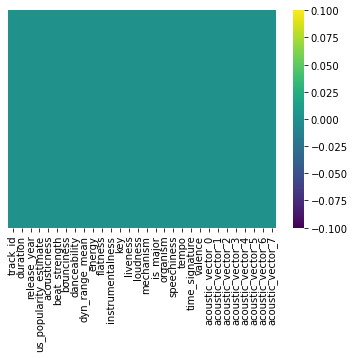

In [15]:
sns.heatmap(tracks_df.isnull(), xticklabels=True, yticklabels=False, cmap='viridis')

**Inference:**

    * There are no null values in the dataset.

<b>Get All Unique Values<b>

In [16]:
tracks_df.nunique()

track_id                  316702
duration                  143339
release_year                  69
us_popularity_estimate    316702
acousticness              315707
beat_strength             312347
bounciness                313244
danceability              312241
dyn_range_mean            312705
energy                    313153
flatness                  284969
instrumentalness          316362
key                           12
liveness                  314648
loudness                   24414
mechanism                  89660
is_major                       2
organism                  313202
speechiness               314581
tempo                      95143
time_signature                 5
valence                   314194
acoustic_vector_0         315730
acoustic_vector_1         315293
acoustic_vector_2         315296
acoustic_vector_3         315893
acoustic_vector_4         315394
acoustic_vector_5         315723
acoustic_vector_6         315388
acoustic_vector_7         315954
dtype: int

<b>Describe dataset<b>

In [27]:
tracks_df.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,...,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000,316702.000000
mean,0.000923,0.883444,-0.022242,0.281541,0.477372,0.497480,0.589497,-0.001272,0.632731,0.993752,...,0.556604,0.488560,0.005364,-0.006707,-0.004315,0.003672,0.002717,-0.003631,0.005902,0.000838
std,1.005991,0.165386,1.014102,0.301165,0.162313,0.188032,0.173186,1.001798,0.228166,0.048357,...,0.063584,0.256182,1.000247,1.002609,1.003723,1.001550,1.001636,1.003240,1.002118,1.002930
min,-2.359677,0.000000,-6.207444,0.000000,0.000000,0.000000,0.000000,-3.247292,0.000000,0.000000,...,0.000000,0.000000,-2.086612,-4.441997,-3.843906,-2.349572,-2.654358,-6.287599,-1.701727,-2.881315
25%,-0.524978,0.852941,-0.169543,0.024083,0.355427,0.349182,0.475606,-0.773883,0.484491,0.971236,...,0.571429,0.281569,-0.834468,-0.497206,-0.627210,-0.762369,-0.799895,-0.538955,-0.728965,-0.619601
50%,-0.105378,0.955882,0.358592,0.156679,0.476761,0.502692,0.603000,-0.095655,0.660723,1.001626,...,0.571429,0.480178,0.083995,0.224900,0.275068,0.070669,-0.238287,0.149411,-0.281970,0.141966
75%,0.375977,0.985294,0.584683,0.485536,0.594337,0.643910,0.720020,0.644239,0.815253,1.025645,...,0.571429,0.691242,0.831649,0.656089,0.715054,0.544088,0.837206,0.727947,0.521096,0.568692
max,19.108514,1.000000,0.715584,0.995796,0.987369,0.975535,0.995690,8.727326,0.999984,1.131413,...,0.714286,0.999990,2.857353,2.315441,2.176667,3.340167,2.442389,2.147237,3.135206,3.441050


<b>plot correlation matrix<b>

In [24]:
matrix = tracks_df.corr()
matrix

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
duration,1.000000,-0.095011,0.011593,-0.068569,-0.107042,-0.118096,-0.125261,-0.118854,0.034007,-0.003439,...,0.034762,-0.143880,0.113799,-0.064947,-0.006181,-0.072530,-0.009498,0.098437,-0.002744,-0.005673
release_year,-0.095011,1.000000,0.043978,-0.081864,0.017600,0.042951,0.105854,0.056327,0.075444,0.122773,...,0.009932,-0.153491,-0.236033,0.385314,0.127085,-0.143903,-0.382882,0.216053,0.004142,0.337059
us_popularity_estimate,0.011593,0.043978,1.000000,-0.043685,-0.024086,-0.030216,0.013653,-0.037462,0.021331,0.025193,...,0.018664,-0.055476,-0.008044,0.119687,0.038018,-0.156700,-0.060138,0.143973,-0.103473,0.014662
acousticness,-0.068569,-0.081864,-0.043685,1.000000,-0.048194,-0.000152,-0.155399,0.016380,-0.643730,0.290644,...,-0.163490,-0.106075,0.276060,-0.531517,-0.084028,0.310847,0.089435,-0.401659,0.198307,-0.395424
beat_strength,-0.107042,0.017600,-0.024086,-0.048194,1.000000,0.966438,0.875023,0.890078,-0.038587,0.219619,...,0.094741,0.465612,-0.546644,0.038682,0.474010,0.415896,-0.163244,-0.148327,0.019906,0.088182
bounciness,-0.118096,0.042951,-0.030216,-0.000152,0.966438,1.000000,0.861296,0.962608,-0.071180,0.220915,...,0.069138,0.452855,-0.587625,0.030813,0.488377,0.465511,-0.182507,-0.203016,0.022183,0.090689
danceability,-0.125261,0.105854,0.013653,-0.155399,0.875023,0.861296,1.000000,0.791796,0.070419,0.186693,...,0.132744,0.440751,-0.571112,0.203356,0.530361,0.291618,-0.193761,0.005400,0.009919,0.124785
dyn_range_mean,-0.118854,0.056327,-0.037462,0.016380,0.890078,0.962608,0.791796,1.000000,-0.091348,0.191748,...,0.043840,0.399811,-0.557200,0.023394,0.429647,0.448699,-0.192304,-0.229389,0.015335,0.104224
energy,0.034007,0.075444,0.021331,-0.643730,-0.038587,-0.071180,0.070419,-0.091348,1.000000,-0.615404,...,0.131072,0.287204,-0.214009,0.530675,0.038175,-0.236077,0.068416,0.321038,-0.020529,0.335032
flatness,-0.003439,0.122773,0.025193,0.290644,0.219619,0.220915,0.186693,0.191748,-0.615404,1.000000,...,0.020332,-0.174013,-0.094043,-0.174243,0.317517,0.202252,-0.162133,-0.021611,0.081786,-0.144347


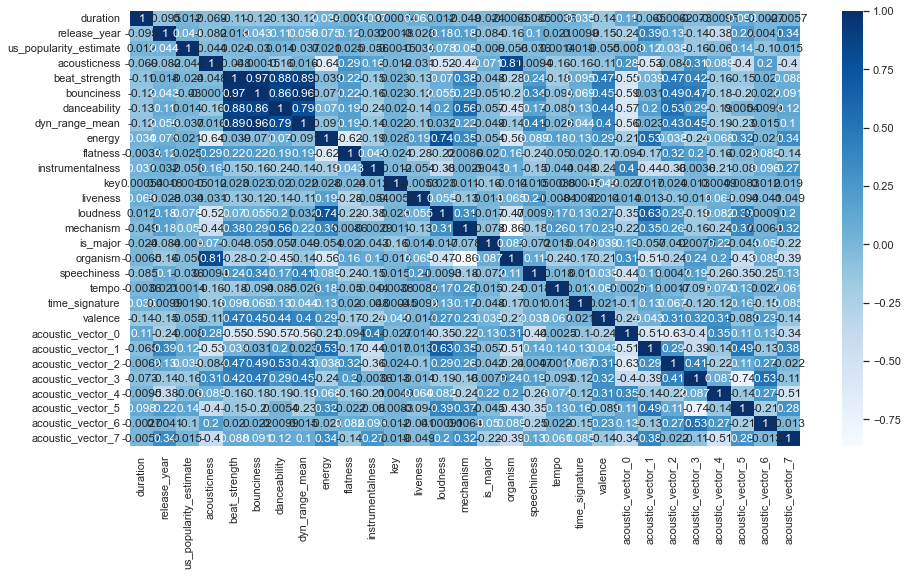

In [25]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(matrix, annot=True, cmap='Blues')
plt.show()

<b>Split dataset into dependent and independent features<b>

In [18]:
X=tracks_df.drop(['track_id', 'us_popularity_estimate'], axis=1) # independent variables
X.head()

,duration,release_year,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,3.866097,0.441176,0.075846,0.499848,0.494943,0.461215,-0.208611,0.563252,0.916317,3.736224e-01,...,0.571429,0.468440,1.034540,-1.040880,-1.281460,-0.375163,1.442307,0.045940,-0.443245,-0.243705
1,1.512969,0.308824,0.085482,0.450139,0.457034,0.663219,-0.305010,0.767307,0.942687,1.000551e-06,...,0.571429,0.655369,0.834594,-0.653568,-0.483168,-0.538935,1.247153,0.414248,-0.468285,-0.931875
2,-1.332280,0.485294,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,0.846197,5.658840e-02,...,0.571429,0.293100,0.846650,0.123691,-2.692681,-0.770798,1.533066,-0.173705,-0.402540,1.181761
3,-0.712162,0.485294,0.005024,0.338580,0.331703,0.348846,-0.795663,0.886674,0.904784,1.998796e-10,...,0.571429,0.387131,0.920349,0.335177,-2.631787,-1.033223,1.549514,-0.036511,-0.488062,1.028883
4,-1.629474,0.573529,0.962717,0.130125,0.092335,0.170027,-2.024206,0.005674,1.072822,9.604511e-01,...,0.428571,0.030858,2.238796,-3.259609,-2.378984,1.288895,-1.053248,-3.132837,0.946820,-0.623612


In [20]:
y = tracks_df['us_popularity_estimate'] # dependent variables
y.head()

0   -0.403765
1    0.314153
2    0.001032
3    0.558944
4   -0.356946
Name: us_popularity_estimate, dtype: float64

<b>Fit a multivariate linear regression<b>

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

<b>Split data to training set and test set<b>